In [69]:
import pandas as pd
import numpy as np
import ast

In [31]:
df = pd.read_csv('data/final_dataset_reduced.csv')
print(len(df))

32014


In [75]:
# songs with social tags
df['general_tags'] = df['emotion_tags'] + df['social_tags']
#df = df[~temp['general_tags'].isna()]
df['tags_temp'] = df['general_tags'].str.extractall(r"'([^']*)'").groupby(level=0).agg(list)

#do multiplication by weight of tag later
df['tags_str'] = df['tags_temp'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# check worked
df.head(20)
#df[df['tags_str'].notna()]

,Unnamed: 0,artist,title,album,lyrics,title_standardized,artist_standardized,album_genre,emotion_tags,social_tags,general_tags,tags_temp,tags_str
0,0,Beyoncé,Drunk in Love,BEYONCÉ,beyoncé i've been drinkin' i've been drinkin' ...,drunkinlove,beyonce,R&amp;B,NaN,NaN,NaN,NaN,
1,1,Beyoncé,Formation,Lemonade,messy mya what happened at the new wil'ins bit...,formation,beyonce,NaN,NaN,NaN,NaN,NaN,
2,2,Beyoncé,Partition,BEYONCÉ,part yoncé let me hear you say hey ms carte...,partition,beyonce,R&amp;B,NaN,NaN,NaN,NaN,
3,3,Beyoncé,Mine,BEYONCÉ,beyoncé i've been watching for the signs took ...,mine,beyonce,R&amp;B,NaN,NaN,NaN,NaN,
4,4,Beyoncé,Hold Up,Lemonade,hold up they don't love you like i love you sl...,holdup,beyonce,NaN,NaN,NaN,NaN,NaN,
5,6,Beyoncé,Sorry,Lemonade,sorry i ain't sorry sorry i ain't sorry i ain'...,sorry,beyonce,NaN,NaN,NaN,NaN,NaN,
6,7,Beyoncé,If I Were a Boy,I Am... Sasha Fierce,if i were a boy even just for a day i'd roll o...,ifiwereaboy,beyonce,R&amp;B,NaN,NaN,NaN,NaN,
7,8,Beyoncé,Pray You Catch Me,Lemonade,you can taste the dishonesty it's all over you...,prayyoucatchme,beyonce,NaN,NaN,NaN,NaN,NaN,
8,9,Beyoncé,All Night,Lemonade,i found the truth beneath your lies and true l...,allnight,beyonce,NaN,NaN,NaN,NaN,NaN,
9,10,Beyoncé,Halo,I Am... Sasha Fierce,remember those walls i built well baby they're...,halo,beyonce,R&amp;B,NaN,NaN,NaN,NaN,


In [30]:
len(df)

32014

In [23]:
len(df['tags_str'] != '')

32014

In [ ]:
x = df[['title', 'tags_str']]

In [29]:
len(x)

32014

In [ ]:
x = list(x.to_records(index=False))

In [24]:
len(x)

32014

In [25]:
x

[('Drunk in Love', ''),
 ('Formation', ''),
 ('Partition', ''),
 ('Mine', ''),
 ('Hold Up', ''),
 ('Sorry', ''),
 ('If I Were a Boy', ''),
 ('Pray You Catch Me', ''),
 ('All Night', ''),
 ('Halo', ''),
 ('***Flawless', ''),
 ('Freedom', ''),
 ('Don’t Hurt Yourself', ''),
 ('Blow', ''),
 ('Rocket', ''),
 ('Sandcastles', ''),
 ('11-Jul', ''),
 ('6 Inch', ''),
 ('Love Drought', ''),
 ('Listen', 'sad heartbreak rnb soul soundtrack female vocalists powerful pop amazing r&b love ballads dreamgirls beautiful 00s power ballad soundtrack of my life musicals amazing vocals ballad musical sad i deserve more enpowering beautiful lyrics fucking awesome emotional my best guilty pleasure music from a motion picture na smutniejsze dni bee favourite my favourite tracks simply beautiful favorite track right now 2007 sexylicious personally meaningful uk top 40 eargasmic explode strength touching lyrics aww at first sight over it deep cuts music for my soul awsome lyrics focused great soundtrack cantando 

In [27]:
x_expt = [_[1] for _ in x if _[1] != '']
len(x_expt)

9469

In [56]:
tags_expt = ' '.join(x_expt)
tags_expt = tags_expt.split()
len(tags_expt), len(set(tags_expt))

(1090915, 49273)

In [38]:
tags_expt

['sad',
 'heartbreak',
 'rnb',
 'soul',
 'soundtrack',
 'female',
 'vocalists',
 'powerful',
 'pop',
 'amazing',
 'r&b',
 'love',
 'ballads',
 'dreamgirls',
 'beautiful',
 '00s',
 'power',
 'ballad',
 'soundtrack',
 'of',
 'my',
 'life',
 'musicals',
 'amazing',
 'vocals',
 'ballad',
 'musical',
 'sad',
 'i',
 'deserve',
 'more',
 'enpowering',
 'beautiful',
 'lyrics',
 'fucking',
 'awesome',
 'emotional',
 'my',
 'best',
 'guilty',
 'pleasure',
 'music',
 'from',
 'a',
 'motion',
 'picture',
 'na',
 'smutniejsze',
 'dni',
 'bee',
 'favourite',
 'my',
 'favourite',
 'tracks',
 'simply',
 'beautiful',
 'favorite',
 'track',
 'right',
 'now',
 '2007',
 'sexylicious',
 'personally',
 'meaningful',
 'uk',
 'top',
 '40',
 'eargasmic',
 'explode',
 'strength',
 'touching',
 'lyrics',
 'aww',
 'at',
 'first',
 'sight',
 'over',
 'it',
 'deep',
 'cuts',
 'music',
 'for',
 'my',
 'soul',
 'awsome',
 'lyrics',
 'focused',
 'great',
 'soundtrack',
 'cantando',
 'com',
 'o',
 'utero',
 'nunesrafah

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
vectorizer = TfidfVectorizer()
td_matrix = vectorizer.fit_transform([i[1] for i in x])

In [53]:
feature_names = vectorizer.get_feature_names() 
feature_names


['00',
 '000',
 '0000',
 '00000',
 '0001',
 '0003',
 '0004',
 '001',
 '0010',
 '001super',
 '002',
 '002lentes',
 '004',
 '004rapides',
 '005dance',
 '005eurodance',
 '007',
 '00d',
 '00s',
 '01',
 '01011001',
 '010897',
 '010s',
 '011',
 '013',
 '014',
 '01a',
 '02',
 '020566',
 '0220',
 '022305',
 '025',
 '03',
 '0309',
 '04',
 '042310',
 '05',
 '05pm',
 '06',
 '060606',
 '060730',
 '0611',
 '06summer',
 '07',
 '0705',
 '0706',
 '0707',
 '070714',
 '0708090',
 '0709',
 '070bpm',
 '0713',
 '07fh',
 '07s',
 '07sp',
 '07w',
 '07wsoft',
 '08',
 '0800200c9a66',
 '0809',
 '08a',
 '08s',
 '09',
 '090405',
 '091jfm',
 '093008',
 '093094',
 '093jas',
 '094101',
 '0issi0',
 '0ld',
 '0ls',
 '0s',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000000000000',
 '1000th',
 '1001',
 '10046and2',
 '1006rh',
 '1007rh',
 '1008rh',
 '10090',
 '1009rh',
 '100favs',
 '100jukeboxhitz',
 '100minutes',
 '100p',
 '100prodeutsch',
 '100topbrits',
 '101',
 '1010rh',
 '1011rh',
 '1017557',
 '101jfm',
 '102',
 '

In [54]:
print(type(td_matrix))
print(td_matrix.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(32014, 45150)


In [58]:
from scipy.sparse.linalg import svds
# do SVD with a very large k (we usually use 100), just for the sake of getting many sorted singular values (aka importances)
u,s,v_trans = svds(td_matrix, k=1000)

In [59]:
print(u.shape)
print(s.shape)
print(v_trans.shape)

(32014, 1000)
(1000,)
(1000, 45150)


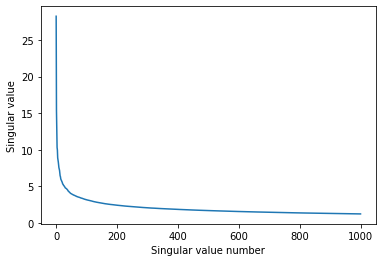

In [60]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [ ]:
# these should be the three output matrices -> not sure if rest of code is important (normalization)
docs_compressed, s, words_compressed = svds(td_matrix, k=40)
words_compressed = words_compressed.transpose()

In [ ]:
print(words_compressed.shape)
print(docs_compressed.shape)

(3741, 40)
(5251, 40)


In [ ]:
word_to_index = vectorizer.vocabulary_
index_to_word = {i:t for t,i in word_to_index.items()}
print(words_compressed.shape)

(3741, 40)


In [ ]:
from sklearn.preprocessing import normalize
words_compressed_normed = normalize(words_compressed, axis = 1)

In [ ]:
def closest_words(word_in, words_representation_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_representation_in.dot(words_representation_in[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]) for i in asort[1:]]

In [ ]:
td_matrix_np = td_matrix.transpose().toarray()
td_matrix_np = normalize(td_matrix_np)

In [ ]:
print(words_compressed)

[[ 0.11469276  0.01499167 -0.04178116 ...  0.01227869 -0.04500237
   0.08675848]
 [-0.00147718 -0.00553769  0.01843281 ...  0.00078956 -0.00224123
   0.00107622]
 [ 0.00105651  0.001075    0.00413631 ... -0.00053237  0.00274742
   0.00148026]
 ...
 [-0.00052137 -0.00349174 -0.01618274 ... -0.00089808  0.00472897
   0.00245881]
 [-0.00052137 -0.00349174 -0.01618274 ... -0.00089808  0.00472897
   0.00245881]
 [ 0.0072361  -0.00619115 -0.00903769 ... -0.00068581  0.00166729
   0.0012022 ]]
